<center> <h1>Kim's CNN for Sentiment Analysis using Keras   </h1></cernter>
<hl>

---



**Anoop K. & Manjary P. Gangan** <br>
CIDA Labs, Department of Computer Science<br>
University of Calicut<br>
https://dcs.uoc.ac.in/~anoop <br>
https://dcs.uoc.ac.in/~manjary <br><br>
________________________

<center><img width="550" height="250" src="https://drive.google.com/uc?id=1TD138tj4cb89_3E62wqsvqR9WUiwNDx_"></center>

# Sentiment Analysis: Predict Sentiment from Movie Reviews with Kim's Model
<div style="text-align: justify">Definition 1: Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine. </div> <br>
<div style="text-align: justify"> Definition 2: Sentiment analysis is a type of data mining that measures the inclination of people’s opinions through natural language processing (NLP), computational linguistics and text analysis, which are used to extract and analyze subjective information from the Web - mostly social media and similar sources. The analyzed data quantifies the general public's sentiments or reactions toward certain products, people or ideas and reveal the contextual polarity of the information.</div>

<center><img width="800" height="600" src="https://drive.google.com/uc?id=1Q90KCeWdyB2vACz2z9rQR27nssYO7Hxi"></center>

# Text to Vector
  > ### 1. TF-IDF
  > ### 2. One-Hot encoding
  > ### 3. Word Embedding

# IMDB Movie Review Sentiment Problem Description
## Dataset Description : Large Movie Review Dataset v1.0
<div style="text-align: justify">The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.
The data was collected by Stanford researchers and was used in a 2011 paper <a href="http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf"> [PDF] </a>where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved.
The data was also used as the basis for a Kaggle competition titled “Bag of Words Meets Bags of Popcorn” in late 2014 to early 2015. Accuracy was achieved above 97% with winners achieving 99%.</div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import glob
import string
import gensim as gs
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

from sklearn.cluster import KMeans
from itertools import repeat

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

from keras.layers import Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.




```
# This is formatted as code
```

## Load the IMDB Dataset from Text File
<div style="text-align: justify">
   The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall istribution of labels is balanced (25k pos and 25k neg). We also include an additional 50,000 unlabeled documents for unsupervised learning. But for this sample <b>we choos 100 negative and 100 positive</b> reviews. 
</div>

In [ ]:
#Read data
path_pos='/content/drive/My Drive/CUK/dataset/aclImdb/pos/*.txt'
path_neg='/content/drive/My Drive/CUK/dataset/aclImdb/neg/*.txt'
files_pos=glob.glob(path_pos)
files_neg=glob.glob(path_neg)
data_pos=[]
data_neg=[]
for file in files_pos:
    f=open(file,'r')
    doc=f.read()
    data_pos.append(doc)
f.close()
 
for file in files_neg:
    f=open(file,'r')
    doc=f.read()
    data_neg.append(doc)

f.close()

In [ ]:
trainFake[4]

NameError: ignored

## Text preprocessing
<div style="text-align: justify">
   In NLP, text preprocessing is the first step in the process of building a model. The various text preprocessing steps are: <br>

   > 1. Tokenization
> 2. Lower casing
> 3. Stop words removal
> 4. Stemming
> 5. Lemmatization
</div>

In [ ]:
#Data Preprocessing 
#lowercasing
lower_pos=[ ]
lower_neg=[ ]
for i in range(len(data_pos)):
    lower_pos.insert(i,data_pos[i].lower()) 
    
for i in range(len(data_neg)):
    lower_neg.insert(i, data_neg[i].lower())
    
#Punctuation Removel 
punc_pos=[ ]
punc_neg=[ ] 
for i in range(len(lower_pos)):
    table = str.maketrans({key: None for key in string.punctuation})
    punc_pos.insert(i,lower_pos[i].translate(table))
    
for i in range(len(lower_neg)):
    table = str.maketrans({key: None for key in string.punctuation})
    punc_neg.insert(i,lower_neg[i].translate(table))

In [ ]:
len(punc_pos)

100

## Train / Test Manual Splitting 

In [ ]:
#Train Test Splits   
trainFake = punc_neg[0:80]
trainReal = punc_pos[0:80]  
train = trainFake + trainReal

testFake = punc_neg[80:]
testReal = punc_pos[80:]
test =  testFake + testReal

In [ ]:
len(testFake)

20

In [ ]:
trainFake[0]

'i only came here to check terror hospital for an alternate title so id know what not to pick up not only do i get the original title but i come to find terror hospital is one of seven more aliasesthis one is a real clunker movies like this can usually be forgiven for any number of reasons mostly unintended consequences of the feature on every level of production that result in at least a mild form of entertainment mostly amusement this has none of that instead the viewer is witness to redundantly unnecessary and waytooconvenientforthesituation exposition and drawn out scenes of characters warily moving from room to room and all this is half of the film forget trying to figure out where anybody is or who they are during darkened or nighttime scenes too you probably wont care anyway there is also a random car chase sequence that seems quite dull when compared to some of the old drivers ed movies i slep er i mean sat through and watched way back in high school really were talking about m

In [ ]:
#Train Test Label
# 0 indicate Fake and 1 indicate Real
yTrain = np.zeros((160,1))
yTrain[0:80] = 0
yTrain[80:160] = 1

yTest = np.zeros((40,1))
yTest[0:20] = 0
yTest[20:50] = 1

##Tokenize text of the train and test data with keras text preprocessing functions

In [ ]:
texts = trainFake + trainReal 
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',lower=True)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(train)
sequences_test=tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6240 unique tokens.


In [ ]:
X_train = pad_sequences(sequences_train)
X_test = pad_sequences(sequences_test,maxlen=X_train.shape[1])

print('Shape of X train and X validation tensor:', X_train.shape,X_test.shape)
print('Shape of label train and validation tensor:', yTrain.shape,yTest.shape)

Shape of X train and X validation tensor: (160, 993) (40, 993)
Shape of label train and validation tensor: (160, 1) (40, 1)


In [ ]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Keras Embedding and CNN Settings
<div style="text-align: justify">
Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. <br>
   <b>Ref #1:</b> https://www.kaggle.com/rajmehra03/a-detailed-explanation-of-keras-embedding-layer <br>
<b>Ref #2:</b> https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
</div>

In [ ]:
max_len = len(X_test[1])
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_layer = Embedding(vocabulary_size,EMBEDDING_DIM, input_length=max_len)

sequence_length = X_train.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5

## Kim's CNN Model


In [ ]:
inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters, (filter_sizes[2], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)
maxpool_2 = MaxPooling2D((sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(dropout)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 993)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 993, 300)     1872300     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 993, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 991, 1, 100)  90100       reshape_1[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 7s 43ms/step - loss: 0.7636 - acc: 0.4500 - val_loss: 0.7498 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 0.74981, saving model to cnn300d_noEmbedd_100epoch.hdf5
Epoch 2/100
160/160 [==============================] - 0s 1ms/step - loss: 0.7335 - acc: 0.6375 - val_loss: 0.7419 - val_acc: 0.6000

Epoch 00002: val_loss improved from 0.74981 to 0.74187, saving model to cnn300d_noEmbedd_100epoch.hdf5
Epoch 3/100
160/160 [==============================] - 0s 1ms/step - loss: 0.7207 - acc: 0.8750 - val_loss: 0.7370 - val_acc: 0.7000

Epoch 00003: val_loss improved from 0.74187 to 0.73703, saving model to cnn300d_noEmbedd_100epoch.hdf5
Epoch 4/100
160/160 [==============================] - 0s 1ms/step - loss: 0.7064 - acc: 0.9438 - val_loss: 0.7333 - val_acc: 0.6500

Epoch 00004: val_loss improved from 0.73703 to 0.73332, saving model to cnn300d_noEmbedd_100epoch.hdf5
Epoch 5/10

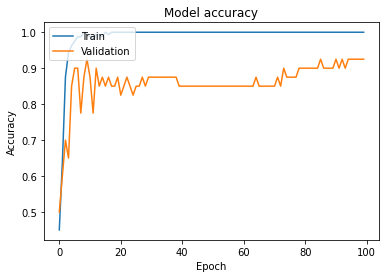

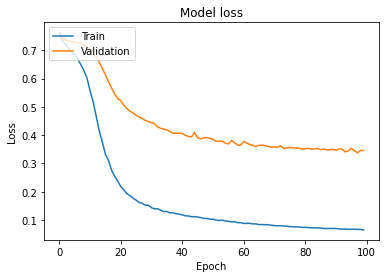

In [ ]:
# this creates a model that includes
model = Model(inputs, output)
adam = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['acc'])
model.summary()
checkpointer = ModelCheckpoint(filepath='cnn300d_noEmbedd_100epoch.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, yTrain, batch_size=32, epochs=100,callbacks=[checkpointer], verbose=1, validation_data=(X_test, yTest))  # starts training

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, yTest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.50%


<b>Further Read:</b> https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/

---



<center><img width="500" height="300" src="https://drive.google.com/uc?id=1LdciBzE4Oc__NE00Bw0TisofYTP0qGc0"></center>